In [1]:
#csvファイルを読み込む
import pandas as pd

# ファイルパス（適宜変更してください）
file_path = "New_England_modern_energy _data.csv"

# 読み込み
df = pd.read_csv(file_path)

# 先頭5行を確認
print(df.head())

# データの概要
print(df.info())

#Modernの最も大きい値を表示
max_modern = df['Modern'].max()
print(f'Modernの最も大きい値: {max_modern}')



   Year  Modern
0  1560   0.128
1  1561   0.100
2  1562   0.101
3  1563   0.103
4  1564   0.104
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    442 non-null    int64  
 1   Modern  442 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB
None
Modernの最も大きい値: 0.984


In [8]:
#年号と、Modernの項だけ抽出して、npで保存
import numpy as np
modern_data = df[['Year', 'Modern']].to_numpy()
np.save('England_modern_data.npy', modern_data)


In [ ]:
England_modern=np.load('England_modern_data.npy')
print(England_modern)
#グラフにする
import matplotlib.pyplot as plt
plt.plot(England_modern[:,0], England_modern[:,1])
plt.xlabel('Year')
plt.ylabel('Modern Ratio')
plt.title('Modern Ratio over Years in England')
plt.grid()
plt.show()  

Fitted parameters: [1.         7.85837215 0.01399621]
Parameter covariance: [[ 8.64172990e-06 -1.36295442e-04 -2.79771210e-07]
 [-1.36295442e-04  1.68226401e-02  1.43048775e-05]
 [-2.79771210e-07  1.43048775e-05  1.72409543e-08]]


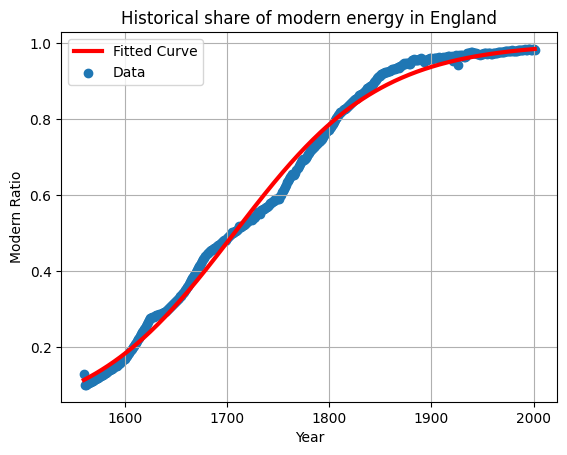

In [11]:
# 関数をフィッティングさせる (年をスケールして安定化させる)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def model_func(x, a, b, c):
    # xを年として直接使うとexpが極端な値になるため、年を最小年基準でスケーリングする
    x = np.array(x, dtype=float)
    x0 = x.min()
    return a / (1 + b * np.exp(-c * (x - x0)))

# データをfloatに変換
xdata = England_modern[:, 0].astype(float)
ydata = England_modern[:, 1].astype(float)

# 初期推定と境界を与えてフィッティング（aは0-1の割合と仮定）
p0 = [max(ydata), 1.0, 0.01]
bounds = ([0.0, 0.0, 0.0], [1.0, 1e6, 1.0])

try:
    popt, pcov = curve_fit(model_func, xdata, ydata, p0=p0, bounds=bounds, maxfev=10000)
    print("Fitted parameters:", popt)
    print("Parameter covariance:", pcov)


    xs = np.linspace(xdata.min(), xdata.max(), 300) 
    plt.plot(xs, model_func(xs, *popt), 'r-', linewidth=3,label='Fitted Curve')
    plt.scatter(xdata, ydata, label='Data')
    plt.xlabel('Year')
    plt.ylabel('Modern Ratio')
    plt.grid()
    plt.legend()
    plt.title('Historical share of modern energy in England')
    
except RuntimeError as e:
    print("Error - curve_fit failed:", e)   